In [5]:
#import basic libraries

import csv
import sys
import os
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import sparse
from scipy import linalg
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import axes3d
#%matplotlib tk
import operator
sys.path.append("../Python_code") # go to parent dir
from reddit import *
from analytics_combined import *
import pandas as pd

In [6]:
import sys
sys.path.append("../Python_code") # go to parent dir
from reddit import *
from canvas_vis import *
from project_data_analysis import *
from generate_proj_to_remove import *

In [7]:
#Run this before anything else!

input_file_proj_22 = "../data_2022/tile_placements_before_whiteout.csv"
input_file_proj_23 = "../data_2023/tile_placements_before_whiteout.csv"
#input_file_proj_den_freq = "../data/sorted_tile_placements_proj_den_freq.csv"
#input_file_proj_den_users = "../data/sorted_tile_placements_proj_den_users.csv"


# js_filename = "../data/atlas.json"
js_filename = "../data_2022/atlas/atlas.json"

locations = store_locations_22(js_filename)

names, descriptions = read_picture_names_and_descriptions(js_filename)

# Generate Table Data

In [4]:
# Number of projects for 2022
!jq length ../data_2022/atlas/atlas.json

10885


In [5]:
# Number of projects for 2023
!jq length ../data_2023/atlas/atlas.json

6244


In [6]:
# Number of Updates 2022
!wc -l ../data_2022/tile_placements_before_whiteout.csv

149560840 ../data_2022/tile_placements_before_whiteout.csv


In [7]:
# Number of UPdates 2023
!wc -l ../data_2023/tile_placements_before_whiteout.csv

122719797 ../data_2023/tile_placements_before_whiteout.csv


In [8]:
# Number of users 2022
!awk -F, '!seen[$2]++{c++} END{print c}' ../data_2022/tile_placements_before_whiteout.csv

10047708


In [9]:
# Number of users 2023
!awk -F, '!seen[$2]++{c++} END{print c}' ../data_2023/tile_placements_before_whiteout.csv

8379414


# Updates Per User

In [10]:
# Compute the updates per user
updates_user, total_updates = updates_per_user(input_file_proj_22)
print("total updates:", total_updates)

total updates: 149560839


In [11]:
sorted_up_user = sorted(updates_user.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_up_user[:10])
#Top-10
for i in range(10):
    proj = sorted_up_user[i]
    up = sorted_up_user[i]

    print("User #" + str(i + 1), ", Num Updates: ", up)

[('kgZoJz//JpfXgowLxOhcQlFYOCm8m6upa6Rpltcc63K6Cz0vEWJF/RYmlsaXsIQEbXrwz+Il3BkD8XZVx7YMLQ==', 771), ('LNbGhj45pAeCvBYQF1dPvwx1zVfVTy8AdRxTSHi0pR9YeabE3sAd3Rz1MbLFT5k14j0+grrVgqYO1/6BA/jBfQ==', 761), ('JMlte6XKe+nnFvxcjT0hHDYYNgiDXZVOkhr6KT60EtJAGaezxc4e/eah6JzTReWNdTH4fLueQ20A4drmfqbqsw==', 760), ('K54RRTUCFuOU55RzSTkjo/ftbJqVi9miyt52YV6NlENRfUyJTPJKBC47N/s2eh4iNdAKMKxa3gvL2XFqCc9AqQ==', 755), ('6QK00igvPdzUYm9SEriCDTbwTmM3RcY17Ynr9FRA6PfLKMUNur4cedRmY9wX4vL6bBoV/JW/Gn6TRRZAJimeLw==', 753), ('DspItMbX4x7ZD/Ozqke3BL3IQs40A3suoSQ8mb5V7Nu8Z1nYWWzGaFSj7UtRC0W75P7JfJ3W+4ne36EiBuo2YQ==', 751), ('VenbgVzRUq0U7MX3agINB3qBtjbEkZh8HmPSQHnkhkTwy/w5C6jodImdPn6bM8izTHI66HK17D4Bom33ZrwuGQ==', 748), ('8USqGo14WuZQLG7PSAwqfFwICkU0G4VyHZTuV8D1QSbQHE5GFdC2mIK/pMEC/qF1FQH912SDim3ptEFkYPrYMQ==', 741), ('jjtKU98x1Bc/qYVoVBq/gQd6yaFiaTrb2vT6fp+Ias+PeaHE9vWC4g7p2KJKLBdjKvo+699EgRouCbeFjWsjKA==', 714), ('VHg2OiSkbBCDTTl1W41fdvDSJk/QtKsdsufSZomBPV3cr2K8+0RW4ILyT1Bmot0bU3bOJyHRPW/w60Y5so4F1g==', 701)]
User #1 ,

In [12]:
# AVG
print("AVG = ", np.mean(np.array(list(updates_user.values()))))

AVG =  14.885071688495694


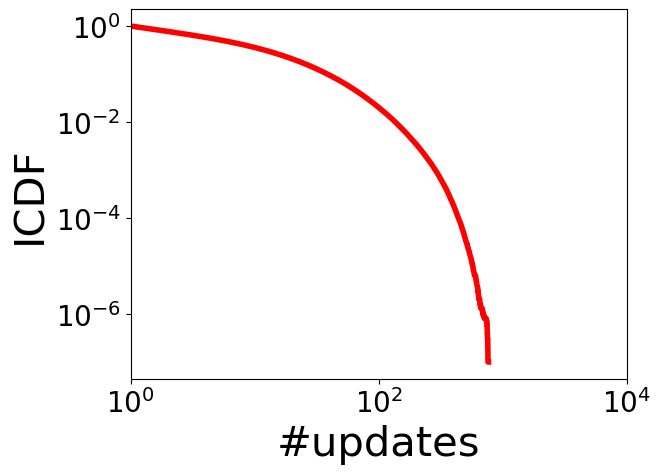

In [13]:
#Inverse cumulative density funcition

def plot_updates_per_user_icdf(count, output_file_name):
    plt.clf()
    ax = plt.subplot(111)
    ax.loglog(range(len(count)), count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('#updates', fontsize=30)
    ax.tick_params(labelsize=20)
    ax.set_xlim(1,10000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    
#Computing ICDF
count = icdf(updates_user)
    
plot_updates_per_user_icdf(count, "../plots/plot_updates_per_user_icdf_22.svg")

In [14]:
# Compute the updates per user
updates_user, total_updates = updates_per_user(input_file_proj_23)
print("total updates:", total_updates)

total updates: 122719796


In [15]:
sorted_up_user = sorted(updates_user.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_up_user[:10])
#Top-10
for i in range(10):
    proj = sorted_up_user[i]
    up = sorted_up_user[i]

    print("User #" + str(i + 1), ", Num Updates: ", up)

[('kN91vAk/cntIE4qOgH6b06ZWInymLuAez37ZA5gv+WfT8CCewv+MDGk1WrI8+25uM+UN1TvXBj+Tl5uQoNvZ7g==', 7504), ('oCgWHk6Cfsa52vAOJBPqBDyKN+OH3Obx0/bXBShVJD/ADN371LAMW/oqwegoh7Hec1psCxzg39QbtRKnL4M3NA==', 6224), ('/YNNvIErSA5atGXTER7fymCxIY/9xvunlE0Kisx+Cbppoi6szjAkwAeHn2cSLimDx6c8/W/4YKYoSr0fKZXBFw==', 4951), ('bRwFe1qJhazPc7ur8S6hK8U0J0iPFVap53hfqoo9lxMebVE7a+ipl2x8FUkL3oRtUjW+0JImeTYb2XQAEq5rjw==', 4510), ('ay5U7RmL4QAj/p06ODdMbVh7lc1LqvfZHMFaU6BNIzcIVD1QSn1gerRGhCtGMqewNZKwpcF/LyWn61YF2r3ZDQ==', 4390), ('tFRL97+0mluUiLf6lR3qQnp4pa/pXVBJ6VN0eXBdExFt0V9fPY8H5YDHp7HiGFCPp2WkONaXd0ippv87shGmcQ==', 4046), ('gAjvJgodeKO2IW3LVwzZxY4rwMxySmHtCuXAlVGVRD0ZPwNdETJ+S+ut7/1FR0IiF35MmZRGp8PZPgDr6D8pFw==', 3987), ('nNbAayT6hRtQHFin/VWfeq4H6iJ/lHOnjfrHSFeIeRxvt3z5YkRHvtp3Q0VO3F6uRny9mDHcjiCYGJ1KJQ6BNg==', 3620), ('/XIhfEKO27ngFqiOWS5VBLbRGEp8eqMghGEcRtH7xFfwtXRZLw5nwqXSFxU8Ez7u4EM2pc/WCuIQ07Okki1Vew==', 3379), ('YuV9dD2Bs8I1RVh5dXFoz9DPeY2s5eyKPp8qqR4lcBq8RM/u/DL7Mit+S7O6VX2KLK+DsF5zfYZgvISP/x2Hnw==', 3164)]

In [14]:
def count_user_update(input_file):
    user_up = dict()
    with open(input_file,'r') as file:
        next(file,None)
        reader = csv.reader(file)
        for r in reader:
            user = r[2]
            if user in user_up:
                user_up[user] += 1
            else:
                user_up[user] = 1
    return user_up

In [15]:
c = count_user_update('../data_2023/tile_placement.csv')

In [16]:
sorted_up_user = sorted(c.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_up_user[:10])
#Top-10
for i in range(10):
    proj = sorted_up_user[i]
    up = sorted_up_user[i]

    print("User #" + str(i + 1), ", Num Updates: ", up)

[('kN91vAk/cntIE4qOgH6b06ZWInymLuAez37ZA5gv+WfT8CCewv+MDGk1WrI8+25uM+UN1TvXBj+Tl5uQoNvZ7g==', 7504), ('oCgWHk6Cfsa52vAOJBPqBDyKN+OH3Obx0/bXBShVJD/ADN371LAMW/oqwegoh7Hec1psCxzg39QbtRKnL4M3NA==', 6285), ('/YNNvIErSA5atGXTER7fymCxIY/9xvunlE0Kisx+Cbppoi6szjAkwAeHn2cSLimDx6c8/W/4YKYoSr0fKZXBFw==', 5331), ('bRwFe1qJhazPc7ur8S6hK8U0J0iPFVap53hfqoo9lxMebVE7a+ipl2x8FUkL3oRtUjW+0JImeTYb2XQAEq5rjw==', 4510), ('ay5U7RmL4QAj/p06ODdMbVh7lc1LqvfZHMFaU6BNIzcIVD1QSn1gerRGhCtGMqewNZKwpcF/LyWn61YF2r3ZDQ==', 4390), ('tFRL97+0mluUiLf6lR3qQnp4pa/pXVBJ6VN0eXBdExFt0V9fPY8H5YDHp7HiGFCPp2WkONaXd0ippv87shGmcQ==', 4046), ('gAjvJgodeKO2IW3LVwzZxY4rwMxySmHtCuXAlVGVRD0ZPwNdETJ+S+ut7/1FR0IiF35MmZRGp8PZPgDr6D8pFw==', 3987), ('nNbAayT6hRtQHFin/VWfeq4H6iJ/lHOnjfrHSFeIeRxvt3z5YkRHvtp3Q0VO3F6uRny9mDHcjiCYGJ1KJQ6BNg==', 3620), ('/XIhfEKO27ngFqiOWS5VBLbRGEp8eqMghGEcRtH7xFfwtXRZLw5nwqXSFxU8Ez7u4EM2pc/WCuIQ07Okki1Vew==', 3413), ('YuV9dD2Bs8I1RVh5dXFoz9DPeY2s5eyKPp8qqR4lcBq8RM/u/DL7Mit+S7O6VX2KLK+DsF5zfYZgvISP/x2Hnw==', 3164)]